<a href="https://colab.research.google.com/github/abelowska/dataPy/blob/main/Classes_03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression

Using an open source [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) we're going to **model** and then **predict** diabetes progression based on multiple features with simple linear regression. The dataset is provided by `sklearn`'s [datasets](https://scikit-learn.org/stable/datasets.html) module which contains multiple datasets useful for studying and experimenting.

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import io

## Load the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

Really, take a look into the documentation :)

In [2]:
diabets_data = datasets.load_diabetes(as_frame=True, scaled=False)

### Inspect the data

In [3]:
# read the description of dataset: the target and features
print(diabets_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabets_data

{'data':       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
 1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
 2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
 3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
 4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
 ..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
 437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
 438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
 439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
 440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
 441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0
 
 [442 rows x 10 columns],
 'target': 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438

In [5]:
diabets_data.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [6]:
diabets_data.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

### Create features dataframe

In [7]:
diabetes_X_df = diabets_data.data
diabetes_X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [8]:
diabetes_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
diabetes_X_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


### Get target dataframe

In [10]:
diabetes_y_df = diabets_data.target
diabetes_y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [11]:
diabetes_y_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [12]:
diabetes_y_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Notice, that X dataset is a `DataFrame` that consists of 10 columns (10 features) and y dataset is a `Series`. If you do not know how I knew where the data was and what parameters are worth checking out - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) :)

Now, let's look deeper inside the data:

### Correlation matrix

In [13]:
# merge target and features into one dataframe
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
df.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,75.0,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,141.0,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,206.0,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,135.0,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [14]:
# create correlation matix
corr = df.corr()

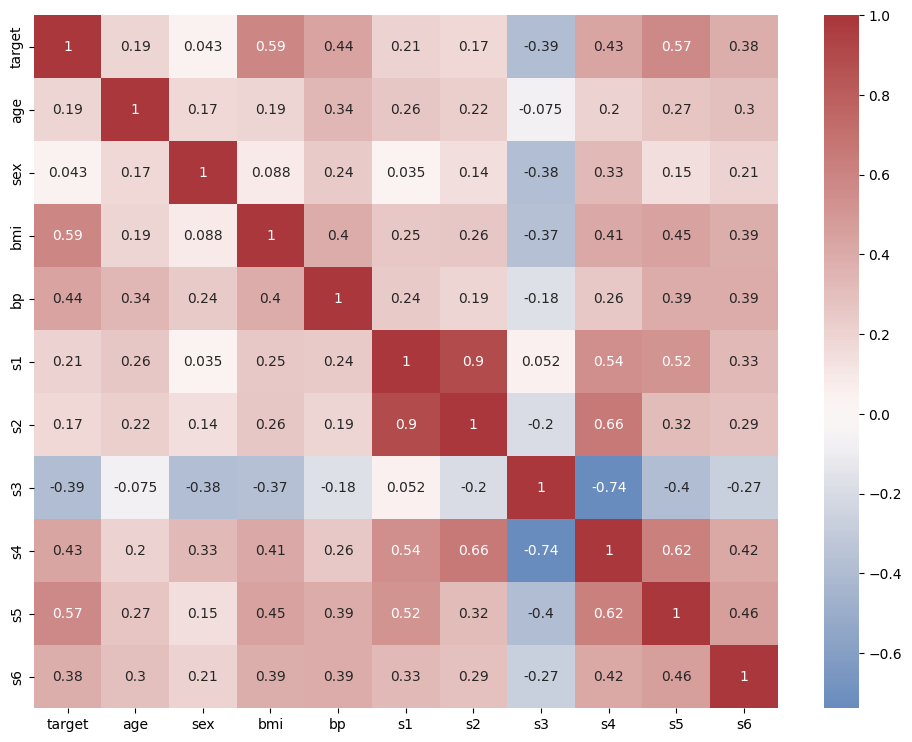

In [15]:
# plot matrix
plt.figure(figsize=(12,9))

sns.heatmap(
    corr,
    center = 0.0,
    annot=True,
    cmap='vlag'
    )

plt.show()

Answer a few questions:

* Is the data numerical or categorical?
* How many features does the dataset have?


**Now, let's look at model of the progression of diabetes (target) based on body mass index (BMI).**

## Model data

Modelling the data usually consists of following steps:

1. Preparing the data: usually you want to select specific columns from your dataframe to create so called feature vector - a set of independent variable(s) (X), and target vector - a set of dependent variable (y).
2. Creating the model object: for most of classic ML cases you will be using sci-kit learn library. To perform linear regression we will use the linear model: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).
3. Feeding the model object with our data (so called fitting). Sci-kit learn (and most of other Python libraries for ML) has specific API. Fitting data to the model is done using the [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method...
4. Predicting data on a basis of our model. ...and prediction is done using the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method. These methods are called **on** model object, e.g., `lm.fit(X,y)`.
5. Visualizing data. In case of one-variable linear regression, try to plot your estimated and original data to see the relationship.
6. Testing goodness of the regression model. Usually, in regression case you want to estimate $R^2$ and MAE, or MSE.

**Converting these steps to the code:**

```
# 1. Prepare data
X = df[['columnA']].to_numpy()
y = df[['columnB']].to_numpy()

# 2. Create model object
from sklearn import linear_model
lm = linear_model.LinearRegression()

# 3. Fit the model
lm.fit(X,y)

# 4. Predict data
y_predicted = lm.predict(X)

# 6. Test the fitted model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y, y_predicted)
mean_squared_error(y, y_predicted)
```

## Exercise 1:

You want to see how is the relationship between BMI (one feature from df dataframe) and diabetes progress (target). Is diabetes progress increase lineary when BMI increase? Or there is no relationship? Or maybe the relationship will not be linear and the linear model is a bad choice? Using the code below try to answere these questions. **That's what analyzing data is**.

In [16]:
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
display(df.head())

# 1a. Select bmi column and transform it to ndarray.
# Make sure that it is 2D array of (n_samples, n_features) shape. - SEE DOCS
X = # your code

# 1b. Select target column and transform it to ndarray.
y = # your code

# 2. Create an object LinearModel() and store it in lin_regressor variable
lin_regressor = linear_model.LinearRegression()

# 3. Fit LinearModel() object with our data
# your code

# 4. Predict y data based on fitted model and X data
y_predicted = # your code

# 5. Visualize original data and predicted data
sns.scatterplot(data = df, x='bmi', y='target') # original
sns.lineplot(x = X.flatten(), y = y_predicted.flatten()) # predicted

# 6. Calculate the coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y, y_predicted)}")
print(f"Mean squared error: {'tu by było dobrze policzyc MSE ;)'}")

SyntaxError: ignored

## Exercise 2 (optional):
This exercise may sound a little boring - but as we want to learn data analysis - it's necessery to deeply understand some terms. Now, try to answere some questions:

1. What does it exactly mean that R^2 has value od 0.34?
2. Is $R^2$ the same as $r^2$ (correlation coefficient)? Estimate the correlation between diabetes and bmi and check it yourself.

In [21]:
# your code here

Is this **always** the case?

3. Try to interpret MSE from exercise 1. What else do you need to make MSE meaningfull? Is there any better mean error metric that is scale-independent and can be interpreted standalone? [HINT](https://www.statisticshowto.com/mean-absolute-percentage-error-mape/)

4. What is the exact linear model of our `target ~ bmi`? Write it down in a form of: $y = a + bx$

5. If you've ever encountered the concept of confidence intervals (CI), you know that it is important and useful in estimating how reliable an effect is obtained. Try calculating the 95% CI for the b coefficient. Do not waste more than 5 minuts for it!

## Exercise 3 (optional):

In previous exercise you were using classical ML library (although we did not perform ML per se). If you are interested in *classical* statistical modelling of your data - good news - you don't have to do this in R. There are nice Python libraries that allow you to create such models in R-style syntax. One of most popular packages is [statsmodels](https://www.statsmodels.org/stable/index.html).

Try to model the same relation as in exercise 1, but using statsmodels. **Comapre results of sklearn and statsmodels.** Read coefficients and CI.

Which library was better to get CI? This exercise was to show you that there is no need to stick to one library. You should always choose what is most suited to your goal.

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)

# your code here

## Exercise 4:

Do you think that age may be important for diabetes progression?

* Create a model `target ~ bmi + age`.

In [ ]:
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
display(df.head())

# 1a. Select bmi AND age columns and transform it to ndarray.
# Make sure that it is 2D array of (n_samples, n_features) shape.
# Note, that the shae of features should be now (n_samples, 2).

X = # your code

# 1b. Select target column and transform it to ndarray.
y = # your code

# 2. Create an object LinearModel() and store it in lin_regressor variable
lin_regressor = linear_model.LinearRegression()

# 3. Fit LinearModel() object with our data
# your code

# 4. Predict y data based on fitted model and X data
y_predicted = # your code

# 5. Visualize original data and predicted data
# :( It's hard to visualize relation between 3 variables.

# 6. Calculate the coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y, y_predicted)}")
print(f"Mean squared error: {mean_squared_error(y, y_predicted)}")

* Print regression coefficients of `bmi` and `age`. These are so called *effects*.
* Is there effect of `age` greater than effect of `bmi`?

In [ ]:
# your code

## Predictive modelling: train-test split

In previous exercises we only modeled relationships on the data we've already had. Do you think that based on your `target ~ bmi` model, you can say that for each person with diabetes, the progression is bmi * XXX? In other words, do you expect every person in the world to have exactly the same effect? If not - why do the authors of almost all papers do so? ;)

It is often important to see if your model has predictive power - to see, whether it works well for unseen data. In that case, you already have a model trained beforehand on some data (like our model `target = a + b*bmi`).

**What you want to do is predict y based on new, previously unused bmi data, and see how good that prediction is relative to the original, real target data.**

In [ ]:
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
display(df.head())

# 1. Prepare data: select bmi column as X and target column as y
X =
y =

# Split your data into two separate sets: training and testing.
# Parameter 'test_size' represent the proportion of the dataset to include in the test split .
#
# to ensure repeatability of splits, we set the random state
# random state (read more: https://en.wikipedia.org/wiki/Random_seed) is used
# whenever we want to have repeatable results of an operation that involves
# a pseudo-random operation, e.g. picking "random" samples from a set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of the X train dataset: {X_train.shape}")
print(f"Shape of the X test dataset: {X_test.shape}")
print(f"Shape of the y train dataset: {y_train.shape}")
print(f"Shape of the y test dataset: {y_test.shape}")

Shape of the X train dataset: (353, 1)
Shape of the X test dataset: (89, 1)
Shape of the y train dataset: (353,)
Shape of the y test dataset: (89,)


## Exercise 5:

Now we can train the model using the training sets and then predict y using only testing set - to see the goodness of prediction on unseen data


In [ ]:
# 2. Create an object LinearModel() and store it in lin_regressor variable
lin_regressor = linear_model.LinearRegression()

# 3. Fit LinearModel() object with our train(!) data
# your code

# 4. Predict y data based on fitted model and test(!) data
y_predicted = # your code

# 5. Visualize original data and predicted data
sns.scatterplot(x=X_test.flatten(), y = y_test.flatten()) # original test data
sns.lineplot(x = X_test.flatten(), y = y_predicted.flatten()) # predicted test data

# 6. Calculate the coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_predicted)}")
print(f"Mean squared error: {'tu by było dobrze policzyc MSE ;)'}")

LinearRegression()

* Are these values different from those calculated in Exercise 1?

# And voilà!

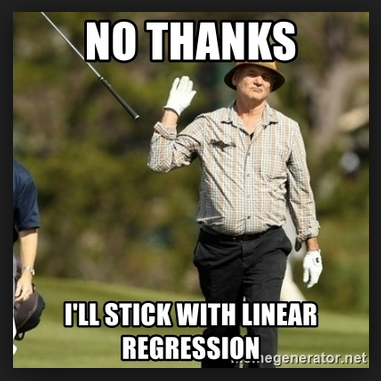

# Notebook Recap

In this notebook we:

- fitted a linear regression model on a whole dataset using scikit-learn library;
- estimated the effect of independent variable on dependent variable;
fitted training dataset;
- fitted a linear regression model on a training dataset and evaluated its performance on the testing data to check its **generalizability**;
- introduced the scikit-learn API `.fit(X, y)` (to train a model), `.predict(X)` (to make predictions);
- used `r2_score(predicted, y)`, `mean_absolute_error(predicted, y)` and `mean_absolute_error(predicted, y)` to evaluate model performance.